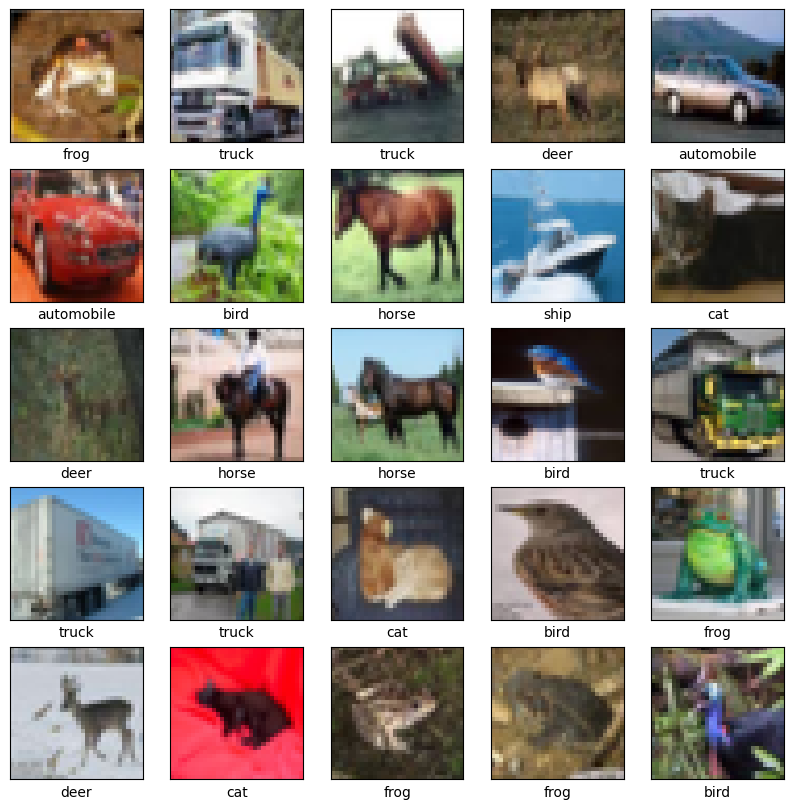

Epoch 1/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.5139 - accuracy: 0.4454 - val_loss: 1.2456 - val_accuracy: 0.5551
Epoch 2/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.1440 - accuracy: 0.5927 - val_loss: 1.0700 - val_accuracy: 0.6226
Epoch 3/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.0034 - accuracy: 0.6459 - val_loss: 0.9790 - val_accuracy: 0.6623
Epoch 4/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9154 - accuracy: 0.6784 - val_loss: 0.9325 - val_accuracy: 0.6697
Epoch 5/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8468 - accuracy: 0.7012 - val_loss: 0.9030 - val_accuracy: 0.6818
Epoch 6/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7874 - accuracy: 0.7233 - val_loss: 0.8623 - val_accuracy: 0.7030
Epoch 7/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7356 - accuracy: 0.7420 - val_loss: 0.9034 -

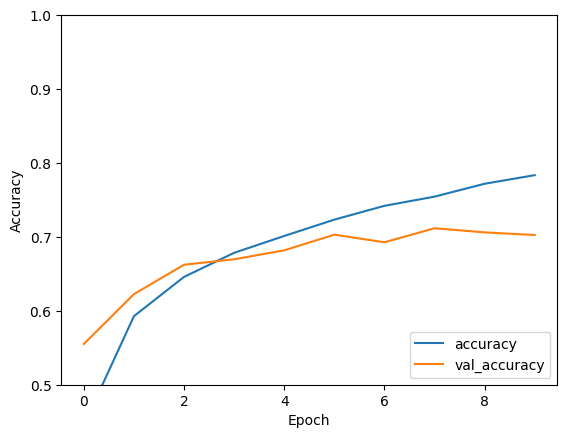

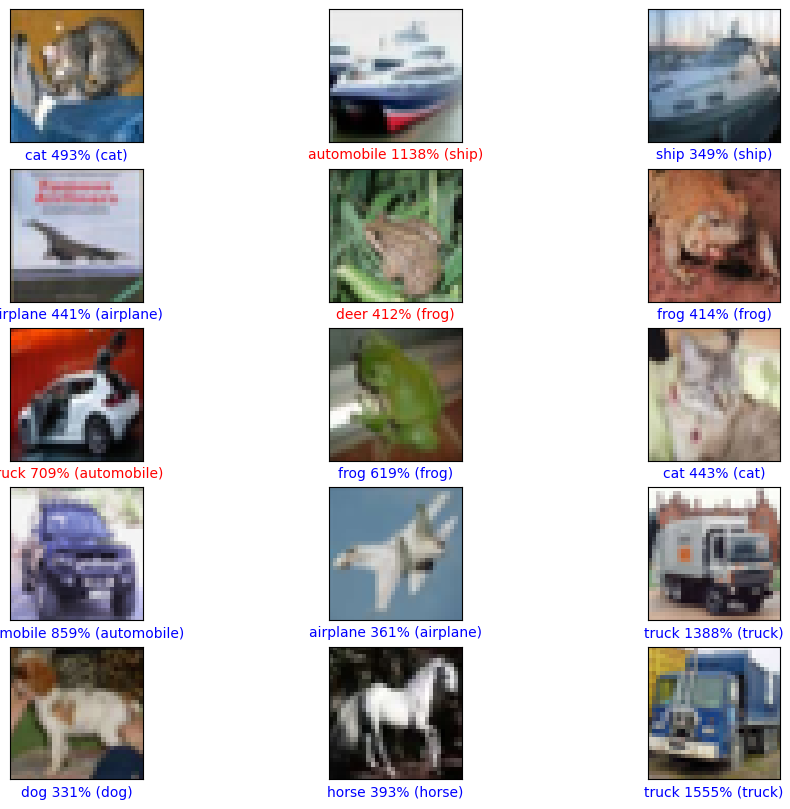

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display the first 25 images from the training set and their class names
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")





#extra code


# Get predictions for the test images
predictions = model.predict(test_images)

# Function to plot the image, its predicted label, and its true label
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i][0], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})", color=color)

# Plot the first X test images, their predicted labels, and the true labels
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
plt.show()

In [ ]:
import numpy as np